# Business Problem

You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds `$10,000`.

## Details

+ The costs of printing and distributing is `$6.50` per catalog.

+ The average gross margin (price - cost) on all products sold through the catalog is `50%`.

+ Make sure to multiply your revenue by the gross margin first before you subtract out the `$6.50` cost when calculating your profit.

We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. For example, if a customer were to buy from us, we predict this customer will buy `$450` worth of products. At a 30% chance that this person will actually buy from us, we can expect revenue to be `$450 x 30% = $135`

In [1]:
# Import the libraries to be used in the model
import pandas as pd
import numpy as np
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load the csv files to be used as train and test data
train_df = pd.read_excel("p1-customers.xlsx")
test_df = pd.read_excel("p1-mailinglist.xlsx")
train_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Unnamed: 12
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0.855754
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,NaN
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0.732315
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,NaN
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,NaN


In [3]:
#Drop the unnnamed column
train_df.rename(columns={'Unnamed: 12':'Error'}, inplace=True)
train_df.drop(columns = ['Error'], inplace = True) # => train_df = train_df.drop(columns =["Mark"]) == train_df.drop("columns_names",axis = 1, inplace = True)
train_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


Rename the column #_Years_as_Customer to Years_as_Customer according to naming conventions

In [4]:
train_df.rename(columns={"#_Years_as_Customer":"Years_as_Customer"},inplace=True)
train_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


Examine the datatypes of the features

In [5]:
train_df.dtypes

Name                           object
Customer_Segment               object
Customer_ID                     int64
Address                        object
City                           object
State                          object
ZIP                             int64
Avg_Sale_Amount               float64
Store_Number                    int64
Responded_to_Last_Catalog      object
Avg_Num_Products_Purchased      int64
Years_as_Customer               int64
dtype: object

Check to see if there are features with null values

In [6]:
train_df.isnull().any()

Name                          False
Customer_Segment              False
Customer_ID                   False
Address                       False
City                          False
State                         False
ZIP                           False
Avg_Sale_Amount               False
Store_Number                  False
Responded_to_Last_Catalog     False
Avg_Num_Products_Purchased    False
Years_as_Customer             False
dtype: bool

As you can see there are no features with null values

Now we check the correlation between our target variable (Avg_Sale_Amount) and the other variables

In [7]:
train_df.corr()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer
Customer_ID,1.000000,0.002159,0.038235,-0.023323,0.060136,0.015164
ZIP,0.002159,1.000000,0.007973,-0.148906,0.001790,0.001643
Avg_Sale_Amount,0.038235,0.007973,1.000000,-0.007946,0.855754,0.029782
Store_Number,-0.023323,-0.148906,-0.007946,1.000000,-0.011525,-0.009573
Avg_Num_Products_Purchased,0.060136,0.001790,0.855754,-0.011525,1.000000,0.043346
Years_as_Customer,0.015164,0.001643,0.029782,-0.009573,0.043346,1.000000


### Use seaborn to visualize the correlation using a heatmap

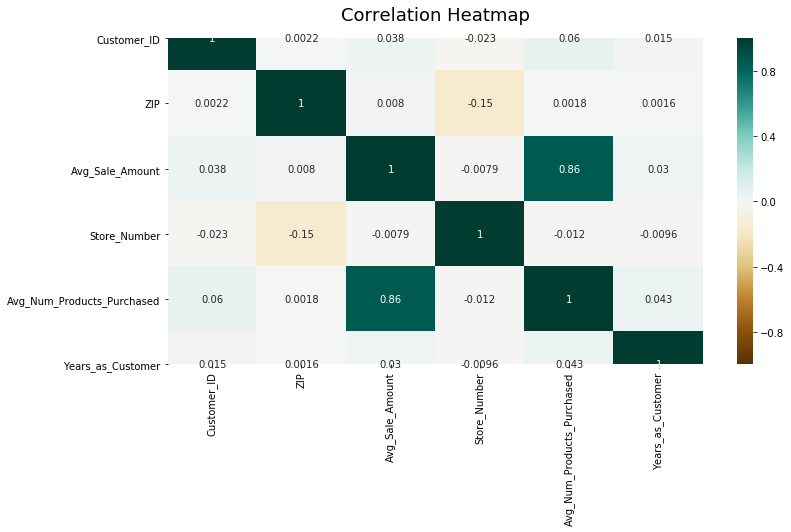

In [8]:
plt.figure(figsize=(12, 6)) #Increase size of heatmap

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True 
# to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=18)

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


From the correlation heatmap we can see there's a strong correlation between Avg_Num_Products_Purchased and Avg_Sale_Amount.

Let's now visualize the correlation between the variables using regplots and boxplots for the categorical variables.

1.  Avg_Num_Products_Purchased vs Avg_Sale_Amount

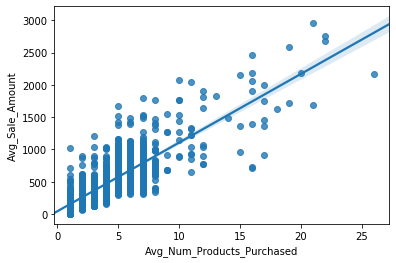

In [9]:
sns.regplot(x="Avg_Num_Products_Purchased",y="Avg_Sale_Amount", data=train_df)

From the above plot we can see there's a strong positive correlation between the feature and the target variable. As the average number of products purchased increases the average sales amount also increases

2. Years_as_Customer vs Avg_Sale_Amount

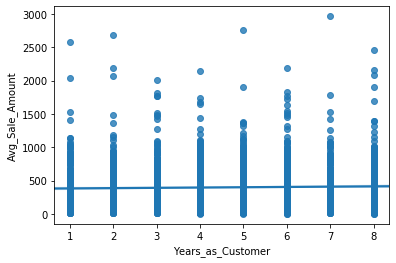

In [10]:
sns.regplot(x="Years_as_Customer",y="Avg_Sale_Amount", data=train_df)

There's a very weak correlation between the variable years as a customer and the average sales amount

I will proceed now to use boxplots to visualize the relationship between the customer segment and the target variable

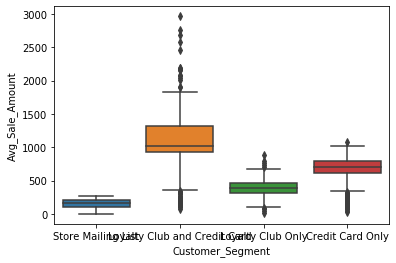

In [11]:
sns.boxplot(x="Customer_Segment",y="Avg_Sale_Amount",data=train_df)

# Descriptive Analytics

In [12]:
train_df.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


In [13]:
train_df.describe(include=["object"])

,Name,Customer_Segment,Address,City,State,Responded_to_Last_Catalog
count,2375,2375,2375,2375,2375,2375
unique,2366,4,2321,27,1,2
top,Maria Gonzalez,Store Mailing List,1470 S Quebec Way,Denver,CO,No
freq,2,1108,6,750,2375,2204


From the boxplot above there's signification variation in the distribution in the different subsets of fthe Customer segment variable. This suggests that we can use this feature in our model since we can definitely see the impact each subset in this category has on the average sales amount.

In [14]:
# Create a variable that will hold the counts of categories in the customer_segment feature and convert the data series to a dataframe
segment_counts=train_df["Customer_Segment"].value_counts().to_frame()
segment_counts.rename(columns={"Customer_Segment":"value_counts"},inplace=True) #Rename the column of the dataframe
segment_counts.index.name = "Segment" # Rename the index of the dataframe
segment_counts

,value_counts
Segment,
Store Mailing List,1108
Loyalty Club Only,579
Credit Card Only,494
Loyalty Club and Credit Card,194


From the value counts above we can see which customer segment has the most number of customers. We can also determine which segment brought the highest sales on average as below:

In [15]:
grouped_df_segment=train_df[["Customer_Segment","Avg_Sale_Amount"]]
grouped_df_segment=grouped_df_segment.groupby(["Customer_Segment"],as_index=False).mean()
grouped_df_segment

,Customer_Segment,Avg_Sale_Amount
0,Credit Card Only,682.678947
1,Loyalty Club Only,396.332573
2,Loyalty Club and Credit Card,1074.159485
3,Store Mailing List,157.361525


From the above table we are able to see that the "Loyalty Club and Credit Card" segment brought in the highest sales amount on average

# Correlation and ANOVA

Here we'll check the correlation between the various features and the target variable and determine their statistical significance in using them for modeling

In [16]:
from scipy import stats

 We'll proceed to compute the pearson coefficients and p-values between the features and the target variable

In [17]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(train_df["Avg_Num_Products_Purchased"],train_df["Avg_Sale_Amount"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  0.8557542170755578 and the P_value =  0.0


In [18]:
# Assign the variables r_coefficient and p_value to the outputs of stats.pearsonr() function
r_coefficient, p_value = stats.pearsonr(train_df["Years_as_Customer"],train_df["Avg_Sale_Amount"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  0.02978186351427337 and the P_value =  0.14679482844799768


From the above analysis we can safely say that Average number of products purchased is statistically significant in building a model to predict profit due to it strong correlation and p-value. 

On the contrary for the feature Years as customer, we can certainly say that this feature is statistically insignificant since it's p-value is greater than 0.001 and has a poor correlation with the target variable

Below we are going to do Analysis of variance on the categorical variable Customer segment:

In [19]:
#ANOVA results for Customer_Segment and Avg_Sale_Amount
f_val,p_val = stats.f_oneway(train_df[["Customer_Segment","Avg_Sale_Amount"]].groupby(["Customer_Segment"]).get_group("Credit Card Only")["Avg_Sale_Amount"],train_df[["Customer_Segment","Avg_Sale_Amount"]].groupby(["Customer_Segment"]).get_group("Loyalty Club Only")["Avg_Sale_Amount"],train_df[["Customer_Segment","Avg_Sale_Amount"]].groupby(["Customer_Segment"]).get_group("Loyalty Club and Credit Card")["Avg_Sale_Amount"],train_df[["Customer_Segment","Avg_Sale_Amount"]].groupby(["Customer_Segment"]).get_group("Store Mailing List")["Avg_Sale_Amount"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 1865.0600552355522 , P = 0.0


The F-test score is quite sizeable and the p-value is 0. This shows that the feature is statistically significant for our model

# Conclusion

NOw that we have a better idea of what our data looks like and which variables are important to take into account when predicting the diamond price. We have narrowed it down to the following variables:

Continuous numerical variables:
+ Avg_Num_Products_Purchased

Categorical variables:

+ Customer_Segment

# Model Development

I will use a Multiple Linear regression algorithm for my model since I have two predictor variables to use in my model.

In [20]:
train_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


First I will drop the columns I will not use in the model.

In [21]:
train_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'Years_as_Customer'],
      dtype='object')

In [22]:
train_df.drop(columns={'Customer_ID', 'Address', 'City', 'State','ZIP', 'Store_Number', 'Responded_to_Last_Catalog', 'Years_as_Customer'},inplace=True)
train_df.head()

,Name,Customer_Segment,Avg_Sale_Amount,Avg_Num_Products_Purchased
0,Pamela Wright,Store Mailing List,227.90,1
1,Danell Valdez,Store Mailing List,55.00,1
2,Jessica Rinehart,Store Mailing List,212.57,1
3,Nancy Clark,Store Mailing List,195.31,1
4,Andrea Brun,Store Mailing List,110.55,1


Then I will create dummy variables for the customer segment features

In [23]:
train_df = pd.get_dummies(train_df, columns=['Customer_Segment'], drop_first=True)
train_df.head()

,Name,Avg_Sale_Amount,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,Pamela Wright,227.90,1,0,0,1
1,Danell Valdez,55.00,1,0,0,1
2,Jessica Rinehart,212.57,1,0,0,1
3,Nancy Clark,195.31,1,0,0,1
4,Andrea Brun,110.55,1,0,0,1


We then proceed to create the MLR model using the Avg_Num_Products_Purcahsed and other dummy variables created, with Avg_Sale_Amount as the target variable

In [24]:
# Define a variable that will hold the predictor variables to be used in the model

x_data = train_df.drop(columns={"Avg_Sale_Amount","Name"})
x_data.head()

,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


Import the linear regression module from scikitlearn

In [25]:
from sklearn.linear_model import LinearRegression

Then create the MLR object:

In [26]:
MLR_Object = LinearRegression()
MLR_Object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
MLR_Object.fit(x_data,train_df["Avg_Sale_Amount"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("Intercept:",MLR_Object.intercept_)
print("Coefficients:",MLR_Object.coef_)

Intercept: 303.46347131467235
Coefficients: [  66.97620492 -149.35572194  281.83876492 -245.4177445 ]


# Check features of the test dataset

In [30]:
test_df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [32]:
test_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased',
       'Years_as_Customer', 'Score_No', 'Score_Yes'],
      dtype='object')

In [34]:
test_df.rename(columns={"#_Years_as_Customer":"Years_as_Customer"},inplace=True)
test_df.drop(columns={'Name','Customer_ID', 'Address', 'City', 'State','ZIP', 'Store_Number','Years_as_Customer'},inplace=True)
test_df.head()

,Customer_Segment,Avg_Num_Products_Purchased,Score_No,Score_Yes
0,Loyalty Club Only,3,0.694964,0.305036
1,Loyalty Club and Credit Card,6,0.527275,0.472725
2,Loyalty Club Only,7,0.421118,0.578882
3,Loyalty Club Only,2,0.694862,0.305138
4,Loyalty Club Only,4,0.612294,0.387706


In [35]:
test_df = pd.get_dummies(test_df,columns=["Customer_Segment"],drop_first=True)
test_df.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,3,0.694964,0.305036,1,0,0
1,6,0.527275,0.472725,0,1,0
2,7,0.421118,0.578882,1,0,0
3,2,0.694862,0.305138,1,0,0
4,4,0.612294,0.387706,1,0,0


In [38]:
test_df.dtypes
# Define a variable to hold the variables that will be used to make the prediction
test_pred=test_df.drop(columns={"Score_No","Score_Yes"})
test_pred.head()

,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,3,1,0,0
1,6,0,1,0
2,7,1,0,0
3,2,1,0,0
4,4,1,0,0


In [40]:
# Make Prediction

predicted_sales = MLR_Object.predict(test_pred)
predicted_sales

array([ 355.03636415,  987.15946577,  622.94118384,  288.06015923,
        422.01256907,  772.29690578,  853.20705592,  705.32070085,
        705.32070085,  422.01256907,  191.99813666,  622.94118384,
        422.01256907,  638.34449593,  772.29690578,  355.03636415,
        488.988774  ,  221.0839543 , 2393.65976916,  504.39208608,
        555.96497892,  355.03636415,  555.96497892,  355.03636415,
        555.96497892,  288.06015923,  719.25464608,  638.34449593,
       1389.01669531,  355.03636415,  355.03636415,  772.29690578,
        705.32070085,  258.97434158,  772.29690578, 1255.06428546,
        555.96497892,  638.34449593,  488.988774  ,  689.91738877,
       1121.11187562, 1121.11187562,  288.06015923,  488.988774  ,
       1455.99290023,  705.32070085,  638.34449593,  191.99813666,
        555.96497892,  288.06015923,  355.03636415,  422.01256907,
        504.39208608,  288.06015923,  221.0839543 ,  221.0839543 ,
        772.29690578,  622.94118384,  705.32070085,  422.01256

In [41]:
# Convert the predicted_prices array to a dataseries and add it as a column to the test_df
test_df['predicted_sales'] = pd.Series(predicted_sales)
test_df.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,predicted_sales
0,3,0.694964,0.305036,1,0,0,355.036364
1,6,0.527275,0.472725,0,1,0,987.159466
2,7,0.421118,0.578882,1,0,0,622.941184
3,2,0.694862,0.305138,1,0,0,288.060159
4,4,0.612294,0.387706,1,0,0,422.012569


In [42]:
test_df["Profit"]=(test_df["predicted_sales"]*test_df["Score_Yes"])*0.5-6.50

In [43]:
test_df.head()

,Avg_Num_Products_Purchased,Score_No,Score_Yes,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,predicted_sales,Profit
0,3,0.694964,0.305036,1,0,0,355.036364,47.649402
1,6,0.527275,0.472725,0,1,0,987.159466,226.827251
2,7,0.421118,0.578882,1,0,0,622.941184,173.804672
3,2,0.694862,0.305138,1,0,0,288.060159,37.449023
4,4,0.612294,0.387706,1,0,0,422.012569,75.308372


# Total Projected Profit

In [52]:
print("The total projected profit is:{:08.2f}".format(test_df["Profit"].sum()))

The total projected profit is:21987.44
